# PCA

Principal Component Analysis is an analytical technique that can be used to catogorise subsets of a set of data. To build the model it initially requires a set of independent variables <br><br>

Large amount of code copied from : https://towardsdatascience.com/partial-least-squares-f4e6714452a

### Required Packages:

fsspec <br>
s3fs <br>
boto <br>
pandas <br>
math <br>
sklean <br>
matplotlib

## Import Data

All data (training, validation, testing) is imported from a csv of format without the header or column names
<br>

|    | ind1 | ind2 | ind3 | ind4 | ind5 | ... 
| --- | --- | --- | --- | --- | --- | --- 
| spectra 1 | 4.0 | 5.0 | 6.0 | 7.0 | 8.0 | ...  
| spectra 2 | 5.0 | 5.3 | 6.5 | 7.7 | 8.0 | ... 
| spectra 3 | 4.3 | 5.6 | 6.5 | 7.0 | 8.1 | ... 
| spectra 4 | 4.2 | 5.2 | 6.3 | 7.3 | 8.2 | ...  
| spectra 5 | 4.6 | 4.9 | 6.3 | 7.4 | 8.5 | ...  
| spectra 6 | 5.7 | 5.7 | 6.7 | 7.3 | 8.6 | ... 



In [5]:
""" #Uncommment if you have not installed these packages in your python environment
%pip install fsspec
%pip install s3fs
%pip install boto
%pip install scikit-learn
"""

import pandas as pd

#simulated data
file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Caramel Detection\RawDataForCaramelDetectionvodka1.csv"
file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Caramel Detection\DataForCaramelDetectionWithout9&23.csv"
file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Caramel Detection\DataForCaramelDetectionWithout9&23limited.csv"
file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\RecycledBottles\DifferentWhiskies\UnopenedBottles.csv"

data = pd.read_csv(file, header = 0,index_col =0)
data
#data = pd.read_csv(file)
#data = data.drop('Unnamed: 0', axis = 1)

#data

,-5246.56392,-5235.604792,-5224.65901,-5213.726552,-5202.807392,-5191.933658,-5181.040984,-5170.19361,-5159.35936,-5148.538211,...,3506.871332,3508.464848,3510.057815,3511.650232,3513.233588,3514.824909,3516.407176,3517.997402,3519.58708,3521.167714
CL14,40.42,25.80,24.56,26.61,246.16,308.96,307.56,267.14,376.95,434.13,...,287.87,307.86,342.69,309.94,269.78,379.06,14.67,27.60,32.58,21.58
CL14,40.42,23.82,27.54,30.59,258.12,322.91,295.61,295.03,369.98,425.16,...,277.91,269.00,344.68,288.03,292.70,340.19,17.65,27.60,29.60,25.56
CL14,36.44,19.84,27.54,27.61,260.11,310.95,323.51,306.99,377.95,428.15,...,317.76,298.89,310.81,311.94,264.80,319.27,19.64,26.61,22.63,22.57
CL14,45.40,22.82,41.47,34.57,259.11,335.86,358.38,325.91,352.04,417.18,...,355.62,277.97,348.67,331.86,273.77,383.05,24.61,40.53,39.54,18.60
CL14,37.44,24.81,24.56,28.60,274.05,352.79,340.44,306.99,417.82,454.06,...,326.72,302.88,357.64,338.83,268.79,345.18,12.68,20.64,24.62,21.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TK10,27.48,14.87,20.58,23.63,215.28,264.13,290.62,235.26,328.12,338.46,...,237.06,247.09,276.94,278.07,261.81,300.33,20.63,32.57,27.61,15.61
TK10,30.47,17.85,23.57,32.58,233.21,289.03,276.68,310.97,354.03,380.31,...,271.93,266.02,299.85,271.09,285.72,300.33,13.67,24.62,35.56,14.62
TK10,34.45,20.83,29.53,28.60,224.25,269.11,272.69,272.12,347.05,382.30,...,258.98,261.03,290.88,290.02,264.80,322.26,14.67,22.63,27.61,19.59
TK10,36.44,19.84,27.54,30.59,242.18,291.03,314.54,299.02,361.01,344.44,...,283.88,260.04,295.86,282.05,234.91,299.34,21.63,31.58,33.57,15.61


## Split the data into training, validation, and test data

Depending on the amount of data, split it into training, validation and test data

In [7]:


place = data.iloc[0:len(data),:]
X_colnames = data.columns
X = place[X_colnames].values
X

array([[40.42, 25.8 , 24.56, ..., 27.6 , 32.58, 21.58],
       [40.42, 23.82, 27.54, ..., 27.6 , 29.6 , 25.56],
       [36.44, 19.84, 27.54, ..., 26.61, 22.63, 22.57],
       ...,
       [34.45, 20.83, 29.53, ..., 22.63, 27.61, 19.59],
       [36.44, 19.84, 27.54, ..., 31.58, 33.57, 15.61],
       [28.48, 17.85, 21.58, ..., 37.54, 30.59, 18.6 ]])

### Different examples of using PLSRegression showing the number of components changes the accuracy of the PLSRegression

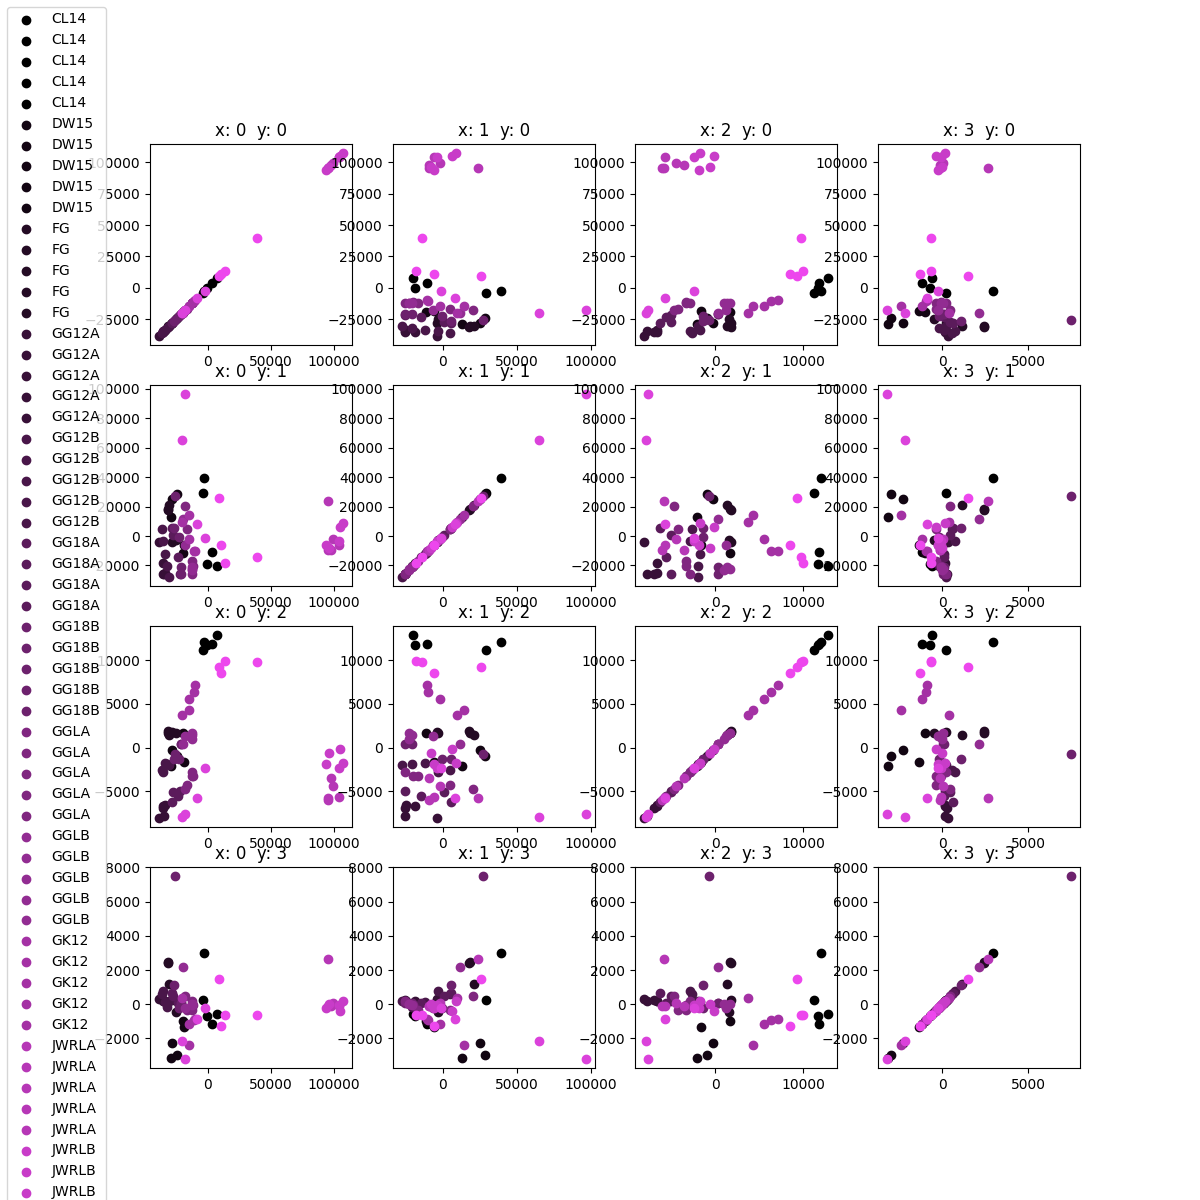

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib ipympl
plt.close("all")


numComponents= 4
numLines = 67
pca = PCA(n_components=numComponents).fit(X)

reduced_data = pca.transform(X)

fig, axs = plt.subplots(numComponents, numComponents, figsize=(3*numComponents, 3*numComponents), label = file)

sampleNames = [data.axes[0][0]]
for i in range(len(data.axes[0])):
    notContained = True
    for j in range(len(sampleNames)):
        if not (notContained and sampleNames[j] != data.axes[0][i]):
            notContained = False

    if notContained:
        sampleNames.append(data.axes[0][i])

for x in range(numComponents):
    for y in range(numComponents):
        for i in range(0,numLines):
            label = "x: " + str(x) + "y: " +str(y)
            index = 0
            for k in range(len(sampleNames)):
                if sampleNames[k] == data.axes[0][i]:
                    index = k
            axs[y][x].scatter(reduced_data[i,x], reduced_data[i, y], label=sampleNames[index], color = (1*index/len(sampleNames),0.3*index/len(sampleNames),1*index/len(sampleNames)))
            axs[y][x].set_title(("x: " + str(x) + "  y: " +str(y)))
            axs[y][x].set_xlabel="first feature"
            axs[y][x].set_ylabel="second feature"
            #axs[y][x].legend()

fig.legend(loc = "upper left")
#ax1.legend()

#fig.show()


In [74]:
plt.close("all")
#reduced_data

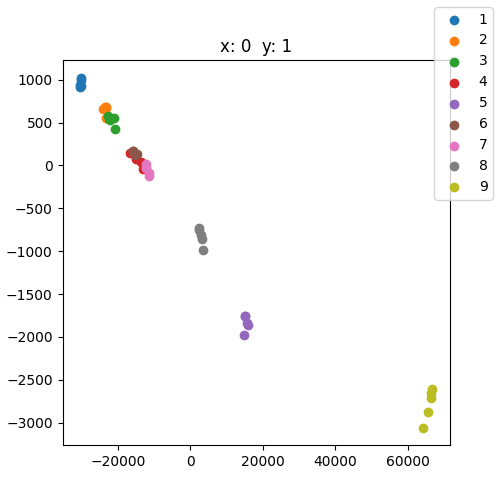

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#%matplotlib ipympl
#plt.close("all")

file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Caramel Detection\RawDataForCaramelDetectionBlend1.csv"

data = pd.read_csv(file, header = 0)

place = data.iloc[0:len(data),:]
X_colnames = data.columns[:len(data)]
X = place[X_colnames].values

#
x= 0
y= 1


reduced_data = pca.transform(X)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), label = file)


numLines = 9
for i in range(0,numLines):
    label = "x: " + str(x) + "y: " +str(y)
    ax.scatter(reduced_data[i*5:i*5+5,x], reduced_data[i*5:i*5+5, y], label=("x: " + str(x) + "y: " +str(y)))
    #, color = (0.5*i/numLines, 1*i/numLines, 1-i/numLines)
    ax.set_title(("x: " + str(x) + "  y: " +str(y)))
    ax.set_xlabel="first feature"
    ax.set_ylabel="second feature"
    #axs[y][x].legend()

fig.legend(np.arange(1,numLines+1), loc = "upper right")

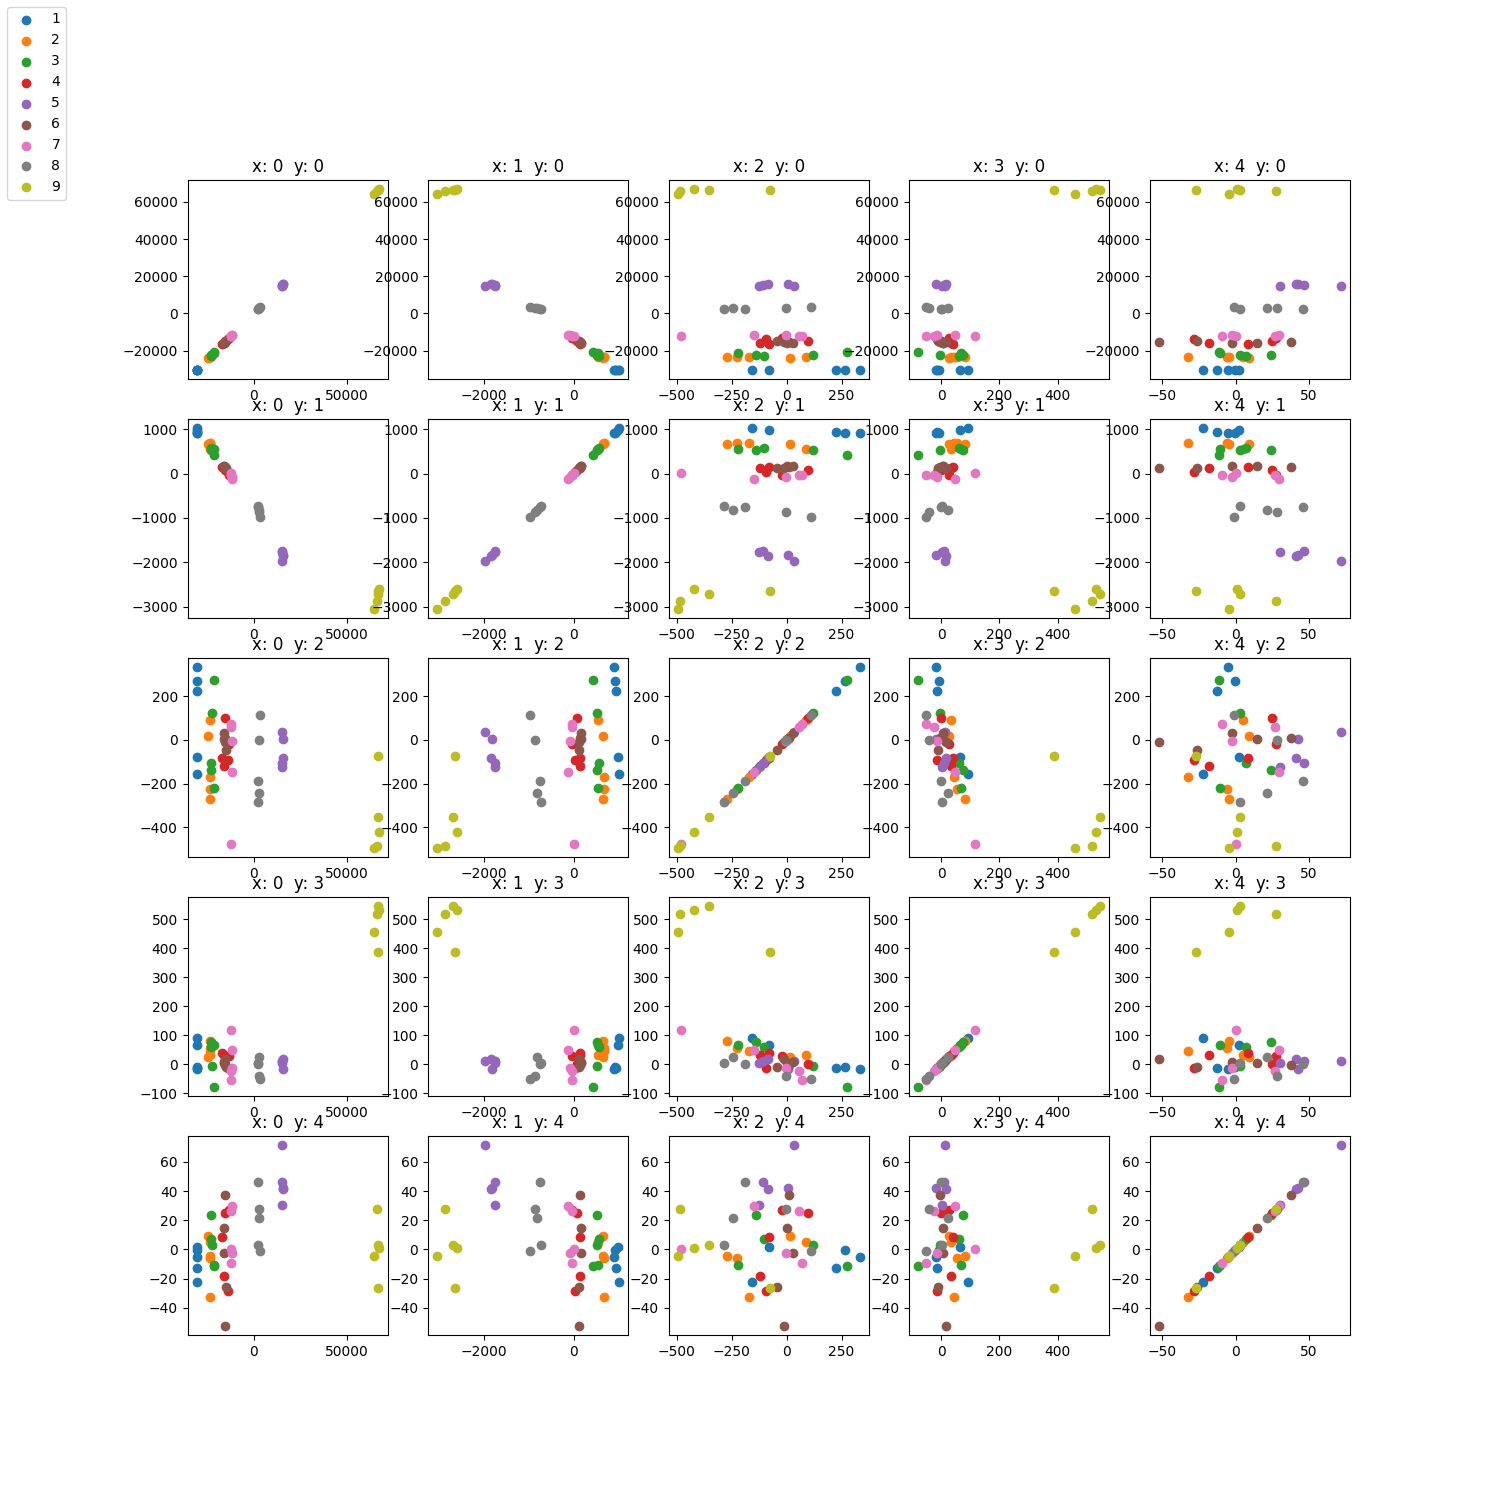

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib ipympl
plt.close("all")

file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Caramel Detection\RawDataForCaramelDetectionBlend1.csv"

data = pd.read_csv(file, header = 0)

place = data.iloc[0:len(data),:]
X_colnames = data.columns[:len(data)]
X = place[X_colnames].values

reduced_data = pca.transform(X)

fig, axs = plt.subplots(numComponents, numComponents, figsize=(3*numComponents, 3*numComponents), label = file)

numLines = 9

for x in range(numComponents):
    for y in range(numComponents):
        for i in range(0,numLines):
            label = "x: " + str(x) + "y: " +str(y)
            axs[y][x].scatter(reduced_data[i*5:i*5+5,x], reduced_data[i*5:i*5+5, y], label=("x: " + str(x) + "y: " +str(y)))
            #, color = (0.5*i/numLines, 1*i/numLines, 1-i/numLines)
            axs[y][x].set_title(("x: " + str(x) + "  y: " +str(y)))
            axs[y][x].set_xlabel="first feature"
            axs[y][x].set_ylabel="second feature"
            #axs[y][x].legend()

fig.legend(np.arange(1,numLines+1), loc = "upper left")